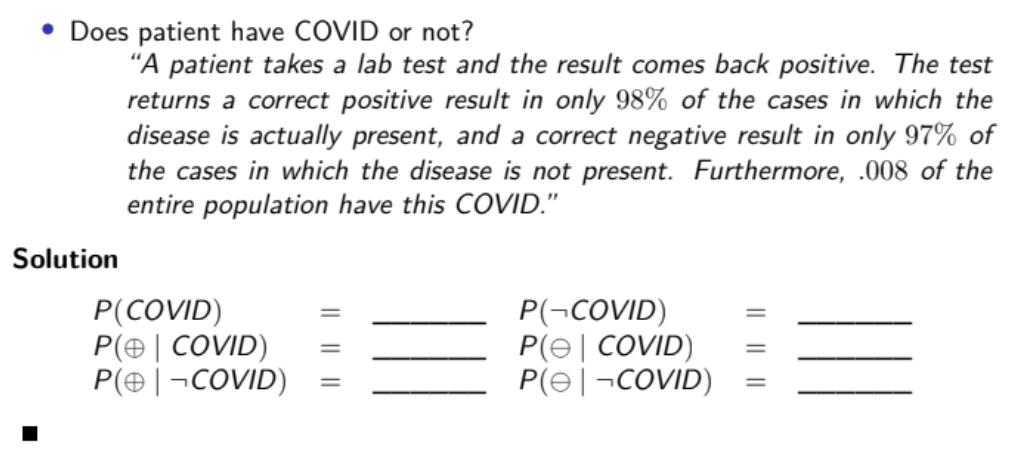

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class BayesModel:
  def __init__(self, Hs):
    self.Hs = Hs.copy()
  def update(self, d):
    # update
    s = 0
    for h in self.Hs.keys():
      self.Hs[h] = self.Hs[h] * self.likelihood(h, d)
      s += self.Hs[h]
    # normalize
    for h in self.Hs.keys():
      self.Hs[h] /= s
  def likelihood(self, h, d):
    if h=='covid':
      if d=='+': return 0.98
      if d=='-': return 0.02
    if h=='non-covid':
      if d=='+': return 0.03
      if d=='-': return 0.97
  def plot(self):
    x = list(self.Hs.keys())
    y = list(self.Hs.values())
    plt.bar(x, y)
    plt.ylabel("belief")
    plt.show()

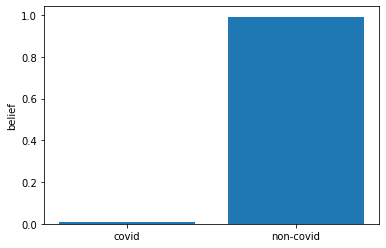

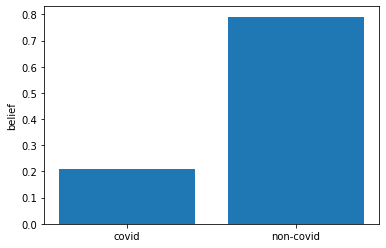

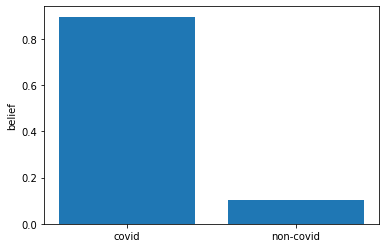

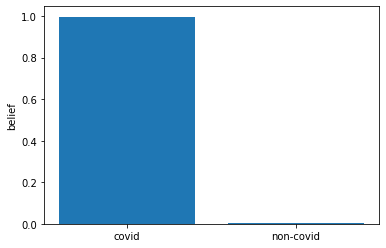

In [4]:
# Niềm tin ban đầu
Hs = {'covid': 0.008, 'non-covid': 0.992}
model = BayesModel(Hs)
model.plot()
model.update('+')
model.plot()
model.update('+')
model.plot()
model.update('+')
model.plot()

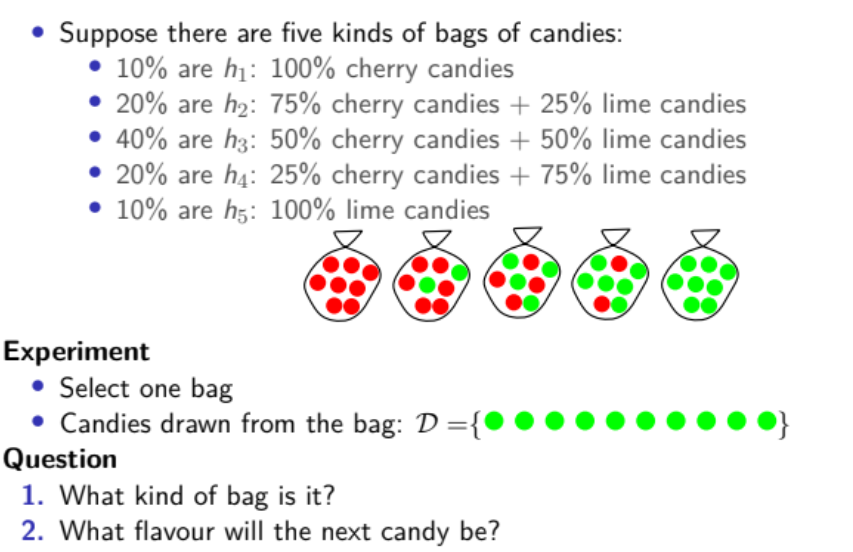

In [5]:
class BayesModel:
  def __init__(self, Hs):
    self.Hs = Hs.copy()
  def update(self, d):
    # update
    s = 0
    for h in self.Hs.keys():
      self.Hs[h] = self.Hs[h] * self.likelihood(h, d)
      s += self.Hs[h]
    # normalize
    for h in self.Hs.keys():
      self.Hs[h] /= s
  def likelihood(self, h, d):
    if h=='h1':
      if d=='c': return 1.0
      if d=='l': return 0.0
    if h=='h2':
      if d=='c': return 0.75
      if d=='l': return 0.25
    if h=='h3':
      if d=='c': return 0.5
      if d=='l': return 0.5
    if h=='h4':
      if d=='c': return 0.25
      if d=='l': return 0.75
    if h=='h5':
      if d=='c': return 0.0
      if d=='l': return 1.0
  def predict(self, d):
    p  = 0
    for h in self.Hs.keys():
      p += self.likelihood(h, d) * self.Hs[h]
    return p
  def plot(self):
    x = list(self.Hs.keys())
    y = list(self.Hs.values())
    plt.bar(x, y)
    plt.ylabel("belief")
    plt.show()

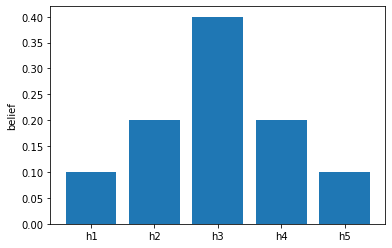

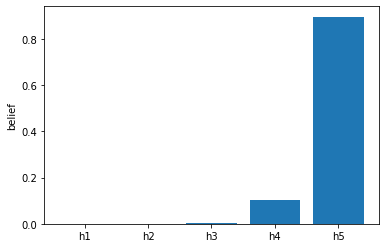

In [6]:
# không gian và niềm tin ban đầu
Hs = {'h1': 0.1, 'h2': 0.2, 'h3': 0.4, 'h4': 0.2, 'h5': 0.1}
santa = BayesModel(Hs)
santa.plot()
# lấy một bịch kẹo và sau 10 viên kẹo độc lập
D = ['l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l']
for d in D:
  santa.update(d)
santa.plot()

In [7]:
print(f'probability of cherry candy = {santa.predict("c")}')
print(f'probability of lime candy = {santa.predict("l")}')

probability of cherry candy = 0.026968530166420104
probability of lime candy = 0.9730314698335799


In [8]:
import pandas as pd
# tập dữ liệu quan sát
df = pd.DataFrame()
df['candy'] = np.array(['l', 'c', 'l', 'c', 'l', 'l', 'c', 'l', 'l', 'l'])
display(df)

,candy
0,l
1,c
2,l
3,c
4,l
5,l
6,c
7,l
8,l
9,l


In [10]:
# xac suat likelihood cua mo hinh voi tham so theta lay ra du lieu d
def likelihood(theta, d):
    # if d=='l': return 1-theta
    # if d=='c': return theta
    return np.where(d=='c', theta, 1-theta)

# xac suat likelihood cua mo hinh voi tham so theta lay ra tap du lieu D
def likelihoodSet(theta, D):
    l = 1
    for d in D:
        l *= likelihood(theta, d)
    return l

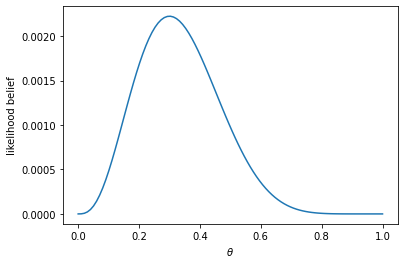

In [11]:
thetas = np.linspace(0, 1, 100)
ls = likelihoodSet(thetas, df['candy'])
plt.plot(thetas, ls)
plt.xlabel('$\\theta$')
plt.ylabel('likelihood belief')
plt.show()